# NLP Application with ML

## Classification of Tweets Data

### The Data

Source: https://www.kaggle.com/crowdflower/twitter-airline-sentiment?select=Tweets.csv

In [93]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from collections import Counter
import warnings
warnings.filterwarnings("ignore")
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.max_columns', 50)

In [94]:
df = pd.read_csv("airline_tweets.csv")
df.head(1)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)


<AxesSubplot:xlabel='airline', ylabel='count'>

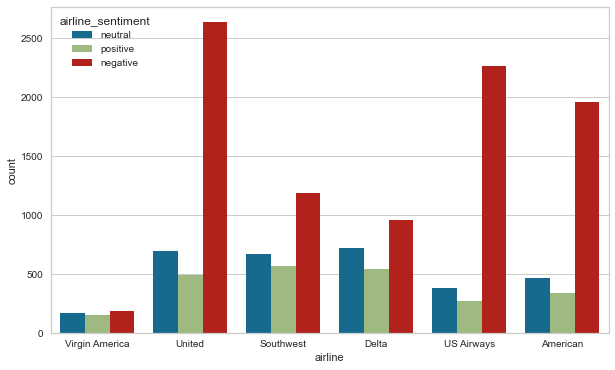

In [95]:
sns.countplot(data = df, x ="airline", hue = "airline_sentiment")

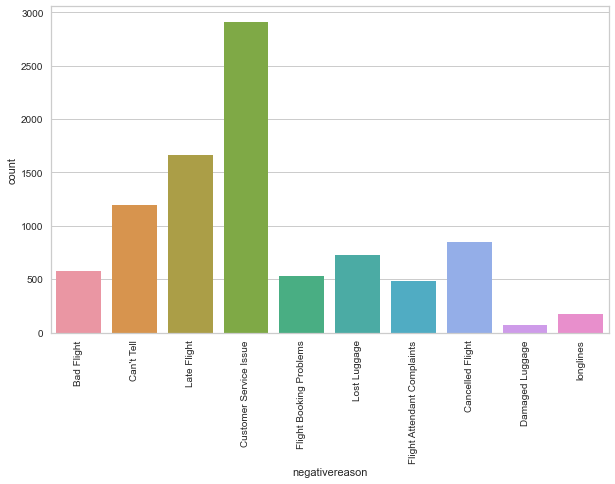

In [96]:
sns.countplot(data =df, x ="negativereason")
plt.xticks(rotation =90);

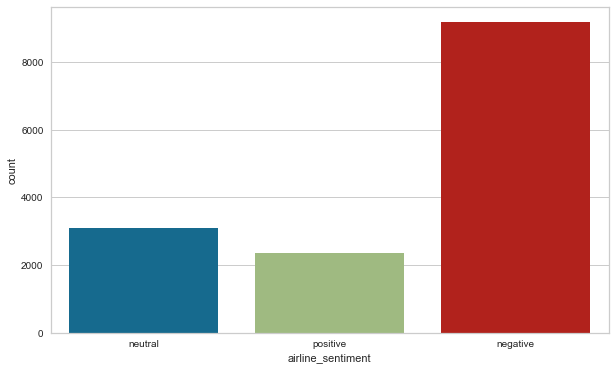

In [97]:
sns.countplot(data =df, x = "airline_sentiment");

In [98]:
df["airline_sentiment"].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

## Cleaning Data

In [99]:
df2 = df.copy()

In [100]:
df2["text"].head()

0                  @VirginAmerica What @dhepburn said.
1    @VirginAmerica plus you've added commercials t...
2    @VirginAmerica I didn't today... Must mean I n...
3    @VirginAmerica it's really aggressive to blast...
4    @VirginAmerica and it's a really big bad thing...
Name: text, dtype: object

In [101]:
pd.Series(df2["text"])

0                      @VirginAmerica What @dhepburn said.
1        @VirginAmerica plus you've added commercials t...
2        @VirginAmerica I didn't today... Must mean I n...
3        @VirginAmerica it's really aggressive to blast...
4        @VirginAmerica and it's a really big bad thing...
                               ...                        
14635    @AmericanAir thank you we got on a different f...
14636    @AmericanAir leaving over 20 minutes Late Flig...
14637    @AmericanAir Please bring American Airlines to...
14638    @AmericanAir you have my money, you change my ...
14639    @AmericanAir we have 8 ppl so we need 2 know h...
Name: text, Length: 14640, dtype: object

In [102]:
df2["text"] = df2["text"].apply(lambda x: pd.Series(x).str.replace("(@+\w+)", ""))
df2["text"].head()

# \w typically matches [A-Za-z0-9_]
# str.fonksiyonlarını (pandastaki fonksiyonları) uygulayabilmem için öncelikle Series haline getiriyorum.

0                                          What  said.
1     plus you've added commercials to the experien...
2     I didn't today... Must mean I need to take an...
3     it's really aggressive to blast obnoxious "en...
4             and it's a really big bad thing about it
Name: text, dtype: object

## Cleaning Data

In [103]:
#nltk.download('stopwords')

In [104]:
#nltk.download('wordnet')

In [105]:
stop_words = stopwords.words('english')

In [106]:
def cleaning(data):
    
    #1. Tokenize
    text_tokens = word_tokenize(data.replace("'", "").lower()) 
     # ayraçları kaldırıyorum ki (can't gibi) olumsuzluk içeren kelimeler içinde ayraç içerdiği için stopwords lerde silinmesin.
        
    #2. Remove Puncs
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]  # noktalama işaretlerinden temizleme
    
    #3. Removing Stopwords
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]  # stopword lerden temizleme
    # tokenleri teker teker al stopwords ler içinde yoksa olduğu gibi yaz, yani stopwords ise yazma.
    
    #4. lemma
    text_cleaned = [WordNetLemmatizer().lemmatize(t) for t in tokens_without_sw]
    
    #joining
    return " ".join(text_cleaned)

In [107]:
" I don't like".replace("'", "")

' I dont like'

In [108]:
df2["text"] = df2["text"].apply(cleaning)
df2["text"].head()

0                                                 said
1         plus youve added commercial experience tacky
2         didnt today must mean need take another trip
3    really aggressive blast obnoxious entertainmen...
4                                 really big bad thing
Name: text, dtype: object

## Removing Rare Words

In [109]:
" ".join(df2["text"]).split()

['said',
 'plus',
 'youve',
 'added',
 'commercial',
 'experience',
 'tacky',
 'didnt',
 'today',
 'must',
 'mean',
 'need',
 'take',
 'another',
 'trip',
 'really',
 'aggressive',
 'blast',
 'obnoxious',
 'entertainment',
 'guest',
 'face',
 'amp',
 'little',
 'recourse',
 'really',
 'big',
 'bad',
 'thing',
 'seriously',
 'would',
 'pay',
 'flight',
 'seat',
 'didnt',
 'playing',
 'really',
 'bad',
 'thing',
 'flying',
 'va',
 'yes',
 'nearly',
 'every',
 'time',
 'fly',
 'vx',
 'ear',
 'worm',
 'go',
 'away',
 'really',
 'missed',
 'prime',
 'opportunity',
 'men',
 'without',
 'hat',
 'parody',
 'http',
 'well',
 'amazing',
 'arrived',
 'hour',
 'early',
 'youre',
 'good',
 'know',
 'suicide',
 'second',
 'leading',
 'cause',
 'death',
 'among',
 'teen',
 'lt',
 'pretty',
 'graphic',
 'much',
 'better',
 'minimal',
 'iconography',
 'great',
 'deal',
 'already',
 'thinking',
 'trip',
 'amp',
 'havent',
 'even',
 'gone',
 'trip',
 'yet',
 'p',
 'im',
 'flying',
 'fabulous',
 'seductiv

In [110]:
rare_words = pd.Series(" ".join(df2["text"]).split()).value_counts()
rare_words

# pandas fonksiyonlarını uygulayabilmem için öncelikle Series haline getiriyorum.

# hangi token kaç defa geçmiş. birazdan en az geçenleri rare_words e tanımlayacağım. 

flight      4544
get         1374
http        1210
hour        1138
thanks      1078
            ... 
holdon         1
goodday        1
straying       1
usaw           1
holla          1
Length: 9881, dtype: int64

In [111]:
rare_words = rare_words[rare_words <= 2] 
rare_words.index
# 2 dahil diğer hepsini sil

Index(['ear', 'disinfectant', 'elaborate', 'faves', 'passion', 'analyst',
       'swaculture', 'wat', 'shed', 'complains',
       ...
       'isitthegarykellyway', 'stagnant', 'jedediah', 'ebola', 'sized',
       'holdon', 'goodday', 'straying', 'usaw', 'holla'],
      dtype='object', length=6155)

In [112]:
len(rare_words)

6155

In [113]:
df2["text"] = df2["text"].apply(lambda x: " ".join([i for i in x.split() if i not in rare_words.index]))
df2["text"].head()

# her bir yorumu al, split le tokenlerine ayır, her birini nadir geçenlere ait olup olmadığına bak
  # değilse liste içine al ve df2["text"] içinde onları topla

0                                                 said
1               plus youve added commercial experience
2         didnt today must mean need take another trip
3    really aggressive entertainment guest face amp...
4                                 really big bad thing
Name: text, dtype: object

## Features and Label

In [114]:
df2 =df2[["airline_sentiment", "text"]]
df2.head()

,airline_sentiment,text
0,neutral,said
1,positive,plus youve added commercial experience
2,neutral,didnt today must mean need take another trip
3,negative,really aggressive entertainment guest face amp...
4,negative,really big bad thing


## Train Test Split

In [115]:
from sklearn.model_selection import train_test_split

In [116]:
X = df2["text"]
y= df2["airline_sentiment"]

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=101)

## Vectorization

In [118]:
from sklearn.feature_extraction.text import CountVectorizer

In [119]:
vectorizer = CountVectorizer()
X_train_count = vectorizer.fit_transform(X_train)  # fit ile  X_trainde geçen unique tüm tokenleri tespit ediyor ve transform ile onları sayıyor
X_test_count = vectorizer.transform(X_test)  # X_train de eğitildiği için X_train de geçme durumuna göre X_test'te sayma işlemini yapar.
                                            # X_testte geçen bir token, eğitildiği X_train de yok ise onu yok sayar, işlem yapmaz
    
# demek ki X_train yeterince büyük olmalı ki X_test içinde geçen tüm tokenler için sayma işlemini yapsın, kelime atlamasın. 

In [120]:
type(X_train_count)

scipy.sparse.csr.csr_matrix

In [121]:
# X_train_count.toarray()

In [122]:
pd.DataFrame(X_train_count.toarray(), columns = vectorizer.get_feature_names())

# benim X_train içerisindeki eğittiğim bütün tokenlerin isimlerini bana getiriyor.

,aa,aadvantage,abc,ability,able,aboard,abq,absolute,absolutely,absurd,abt,abysmal,ac,accept,acceptable,accepted,accepting,access,accident,accidentally,accommodate,accommodating,accommodation,accomplished,according,...,yell,yelled,yelling,yep,yes,yest,yesterday,yet,yo,york,youd,youll,young,youre,yousuck,youth,youve,yr,yuma,yup,yvr,yyz,zero,zone,zurich
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11707,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11708,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11709,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11710,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [123]:
X_train

12713    thanks attendant flight connect flight held ra...
10849    thanks dc yet see keep link check back appreciate
9726     always nice customer service manager customer ...
4751                                       bag clothes bag
14102    worst customer service airline ive ever encoun...
                               ...                        
6570                    used love keep rescheduling flight
1206        people mci jet airway segment anytime december
10563    hey based number like fb post nice know im alo...
13872                                       doesnt twitter
11333             run piece shit airline thanks ruining aa
Name: text, Length: 11712, dtype: object

## Model Comparisons - Vectorization

In [124]:
from sklearn.metrics import plot_confusion_matrix,classification_report, f1_score, recall_score

In [125]:
def eval(model, X_train, X_test):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    print("Test_Set")
    print(classification_report(y_test,y_pred))
    print("Train_Set")
    print(classification_report(y_train,y_pred_train))
    plot_confusion_matrix(model,X_test, y_test)

## Naive Bayes

In [126]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB # BernoulliNB for binary models

# MultinomialNB, birden fazla label var ise bunun kullanılması tavsiye ediliyor.

# yine de multinomial ve bernoille den ikisini de deneyip hangisi daha iyi sonuç veriyorsa onunla devam etmek gerekiyor.
# (önceden denenmiş ve MulitnomialNB daha iyi çıkmış.)

# A olayı gerçekleştiğinde B olayının gerçekleşme olasılığı nedir? (P(A|B))
# B olayı gerçekleştiğinde A olayının gerçekleşme olasılığı nedir? (P(B|A))
# Datasetime nasıl uygulayabilirim?
# P(dont | negative) --> dont yardımcı fiili geçtiğinde bunun negatif olma ihtimali nedir
# P(dont enjoy|positive) --> dont ve enjoy tokenleri birlikte geçtiğinde positive olma ihtimali nedir

In [127]:
nb = MultinomialNB()
nb.fit(X_train_count, y_train)

MultinomialNB()

NB MODEL
Test_Set
              precision    recall  f1-score   support

    negative       0.82      0.88      0.85      1836
     neutral       0.62      0.49      0.55       620
    positive       0.70      0.72      0.71       472

    accuracy                           0.77      2928
   macro avg       0.72      0.69      0.70      2928
weighted avg       0.76      0.77      0.76      2928

Train_Set
              precision    recall  f1-score   support

    negative       0.86      0.92      0.89      7342
     neutral       0.74      0.61      0.66      2479
    positive       0.80      0.78      0.79      1891

    accuracy                           0.83     11712
   macro avg       0.80      0.77      0.78     11712
weighted avg       0.82      0.83      0.83     11712



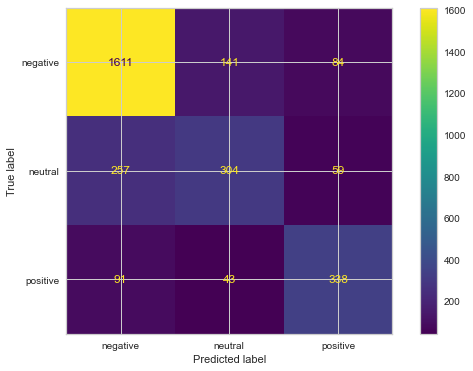

In [128]:
print("NB MODEL")
eval(nb, X_train_count, X_test_count)

# skorlarım dengeli. dolayısıyla overfitting olmadığını anlıyoruz.

In [129]:
# 3 skorunda iyi olmasını istiyorum. Modeli seçerken buna dikkat ediyorum.

# Burada 3 hususa bakarak modelimize karar verdik. 
# 1-modelimin negative label ları ayırmadaki genel performansı
# 2-F1 score (Harmonik ortalama (Recall-Precision))
# 3-Recall Score

# bizim için model iyi demek aynı zamanda yaptığı tahminlerin de doğru olması demek
# hem F1 hem de Recal score yüksek olsun istiyorum
# modelimin performansı önemli. ona da bakmalıyım
# SVM çalıştırmada maliyetli, logres daha eski ve insight daha fazla olduğuundan LOGREG TF-IDF seçildi
# BAKACAKLARIMIZ
# Öncelikle F1_Score_Negative (Precision ve Recall Score ların Harmonic Ortalaması)
# Recall_Score_Negative (Negatif Skoru bulmada modelimin performansı)(Olumsuz yorumlar)
# Precision_Score_Negative

In [130]:
# RECALL : Label ları ne kadar doğru bilmiş
# Modelimizin tutarlı score vermesi için Recall ve Precision arasındaki dengeye bakıyoruz. 2 side yüksek olsun.

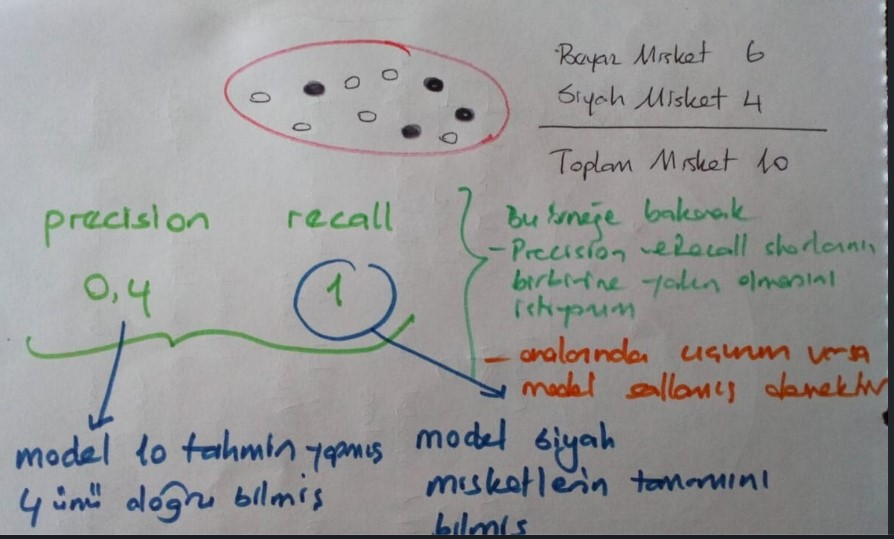

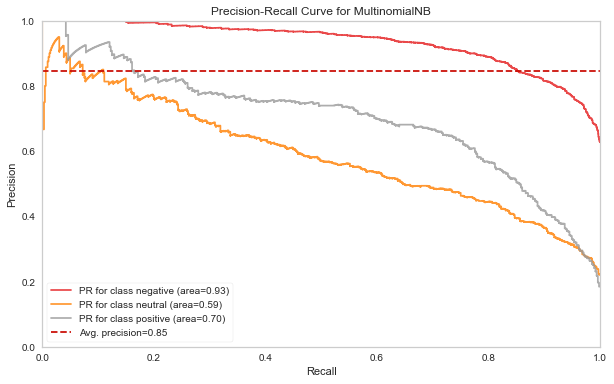

In [131]:
from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(
    MultinomialNB(),
    classes=nb.classes_,   # label ların isimleri ile gözükmesi için.. aksi halde isim yerine 0,1,2 diye gözükür 
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

# datada dengesizlik (umbalance) söz konusu olduğu için skorlarım gerçekçi olsun diye viz = PrecisionRecallCurve u kullandım.


In [132]:
viz.score_

{'negative': 0.9330771865970376,
 'neutral': 0.5883088013644632,
 'positive': 0.7006436946457255,
 'micro': 0.846695191876658}

In [133]:
viz.score_["negative"] # bu şekilde teker teker de alınablir.

0.9330771865970376

In [134]:
y_pred = nb.predict(X_test_count)
nb_count_rec_neg = recall_score(y_test, y_pred, labels = ["negative"], average = None)
nb_count_f1_neg = f1_score(y_test, y_pred, labels = ["negative"], average = None)
nb_AP_neg = viz.score_["negative"]

## Logistic Regression

In [135]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(C = 0.02, max_iter=1000) #class_weight='balanced'
log.fit(X_train_count,y_train)

# Hoca, overfit i çözmek için C skoru ile oynandığını ve en uygun skorun 0.02 olduğunu bulduğunu söyledi. iter'i de arttırmış.

LogisticRegression(C=0.02, max_iter=1000)

LOG MODEL
Test_Set
              precision    recall  f1-score   support

    negative       0.75      0.96      0.84      1836
     neutral       0.67      0.28      0.40       620
    positive       0.75      0.51      0.61       472

    accuracy                           0.74      2928
   macro avg       0.72      0.58      0.62      2928
weighted avg       0.73      0.74      0.71      2928

Train_Set
              precision    recall  f1-score   support

    negative       0.75      0.97      0.85      7342
     neutral       0.76      0.32      0.45      2479
    positive       0.80      0.51      0.62      1891

    accuracy                           0.76     11712
   macro avg       0.77      0.60      0.64     11712
weighted avg       0.76      0.76      0.73     11712



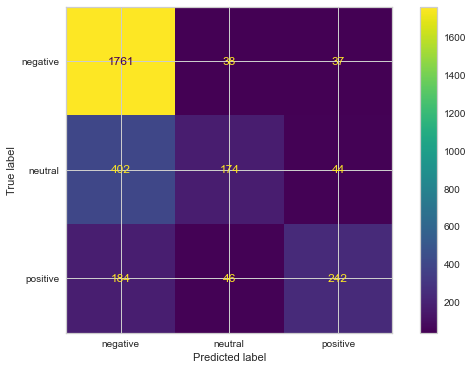

In [136]:
print("LOG MODEL")
eval(log, X_train_count, X_test_count)

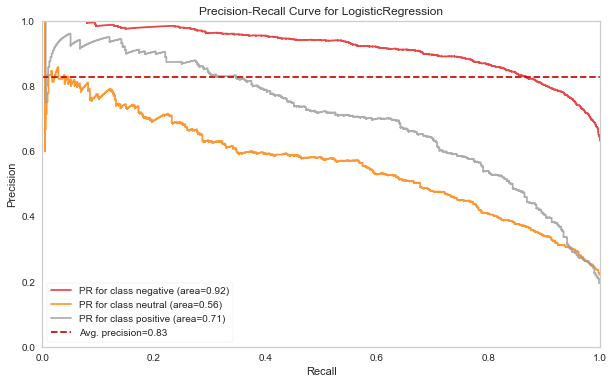

In [137]:
viz = PrecisionRecallCurve(
    LogisticRegression(C = 0.02, max_iter=1000),
    classes=log.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [138]:
y_pred = log.predict(X_test_count)
log_count_rec_neg = recall_score(y_test, y_pred, labels = ["negative"], average = None)
log_count_f1_neg = f1_score(y_test, y_pred, labels = ["negative"], average = None)
log_AP_neg = viz.score_["negative"]

In [139]:
log = LogisticRegression(C = 0.02, max_iter=1000, class_weight='balanced')
log.fit(X_train_count,y_train)

LogisticRegression(C=0.02, class_weight='balanced', max_iter=1000)

LOG MODEL BALANCED
Test_Set
              precision    recall  f1-score   support

    negative       0.90      0.71      0.79      1836
     neutral       0.46      0.71      0.56       620
    positive       0.64      0.71      0.67       472

    accuracy                           0.71      2928
   macro avg       0.67      0.71      0.68      2928
weighted avg       0.76      0.71      0.73      2928

Train_Set
              precision    recall  f1-score   support

    negative       0.92      0.74      0.82      7342
     neutral       0.52      0.78      0.62      2479
    positive       0.67      0.75      0.70      1891

    accuracy                           0.75     11712
   macro avg       0.70      0.75      0.71     11712
weighted avg       0.80      0.75      0.76     11712



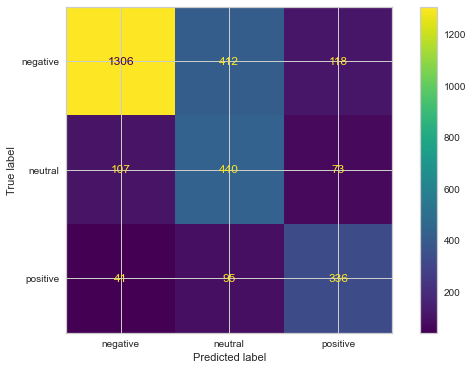

In [140]:
print("LOG MODEL BALANCED")
eval(log, X_train_count, X_test_count)

## SVM

In [141]:
from sklearn.svm import LinearSVC
svc = LinearSVC()  
svc.fit(X_train_count,y_train)

# C vermediğimde.. test ile train skrolarını karşılaştır --> overfittinge dikkat! 

LinearSVC()

SVC MODEL
Test_Set
              precision    recall  f1-score   support

    negative       0.85      0.84      0.84      1836
     neutral       0.56      0.57      0.57       620
    positive       0.70      0.71      0.70       472

    accuracy                           0.76      2928
   macro avg       0.70      0.71      0.70      2928
weighted avg       0.76      0.76      0.76      2928

Train_Set
              precision    recall  f1-score   support

    negative       0.95      0.96      0.96      7342
     neutral       0.87      0.84      0.85      2479
    positive       0.92      0.91      0.91      1891

    accuracy                           0.93     11712
   macro avg       0.91      0.90      0.91     11712
weighted avg       0.93      0.93      0.93     11712



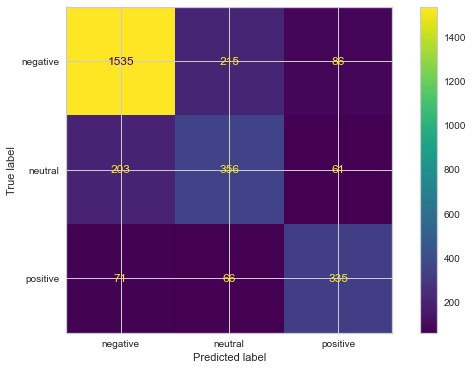

In [142]:
print("SVC MODEL")
eval(svc, X_train_count, X_test_count)

In [143]:
svc = LinearSVC(C=0.01)
svc.fit(X_train_count,y_train)

# C=0.01 girince overfit ortadan kalktı! (test ile train skorları birbirine yakın)

LinearSVC(C=0.01)

SVC MODEL
Test_Set
              precision    recall  f1-score   support

    negative       0.79      0.94      0.86      1836
     neutral       0.69      0.39      0.50       620
    positive       0.75      0.62      0.68       472

    accuracy                           0.77      2928
   macro avg       0.74      0.65      0.68      2928
weighted avg       0.76      0.77      0.75      2928

Train_Set
              precision    recall  f1-score   support

    negative       0.81      0.96      0.88      7342
     neutral       0.78      0.48      0.60      2479
    positive       0.81      0.62      0.70      1891

    accuracy                           0.80     11712
   macro avg       0.80      0.69      0.73     11712
weighted avg       0.80      0.80      0.79     11712



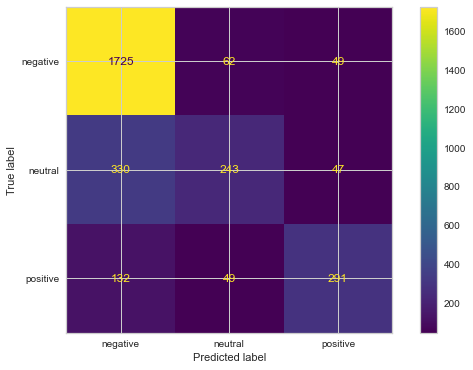

In [144]:
print("SVC MODEL")
eval(svc, X_train_count, X_test_count)

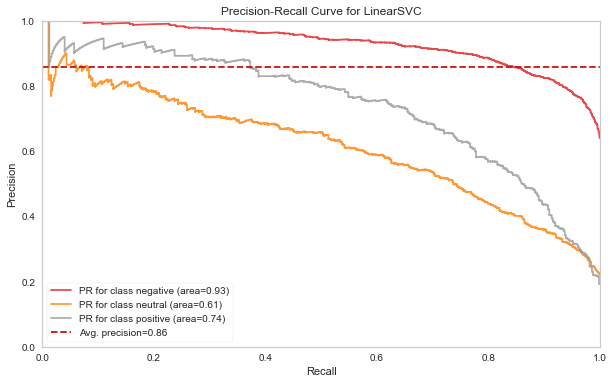

In [145]:
viz = PrecisionRecallCurve(
    LinearSVC(C=0.01),
    classes=svc.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [146]:
y_pred = svc.predict(X_test_count)
svc_count_rec_neg = recall_score(y_test, y_pred, labels = ["negative"], average = None)
svc_count_f1_neg = f1_score(y_test, y_pred, labels = ["negative"], average = None)
svc_AP_neg = viz.score_["negative"]

## KNN

In [147]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_count,y_train)

KNeighborsClassifier(n_neighbors=7)

KNN MODEL
Test_Set
              precision    recall  f1-score   support

    negative       0.85      0.46      0.60      1836
     neutral       0.30      0.74      0.43       620
    positive       0.64      0.53      0.58       472

    accuracy                           0.53      2928
   macro avg       0.59      0.58      0.53      2928
weighted avg       0.70      0.53      0.56      2928

Train_Set
              precision    recall  f1-score   support

    negative       0.89      0.59      0.71      7342
     neutral       0.38      0.82      0.51      2479
    positive       0.70      0.54      0.61      1891

    accuracy                           0.63     11712
   macro avg       0.65      0.65      0.61     11712
weighted avg       0.75      0.63      0.65     11712



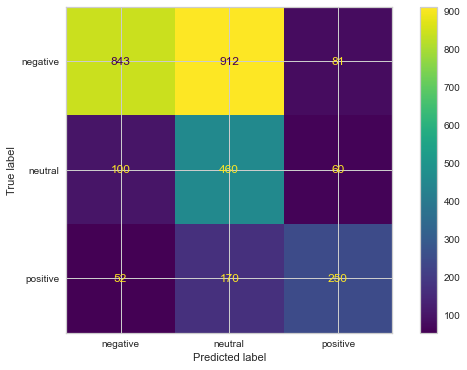

In [148]:
print("KNN MODEL")
eval(knn, X_train_count, X_test_count)

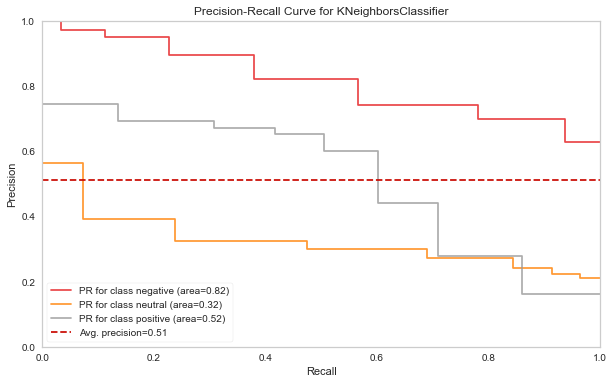

In [149]:
viz = PrecisionRecallCurve(
    KNeighborsClassifier(n_neighbors=7),
    classes=knn.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [150]:
y_pred = knn.predict(X_test_count)
knn_count_rec_neg = recall_score(y_test, y_pred, labels = ["negative"], average = None)
knn_count_f1_neg = f1_score(y_test, y_pred, labels = ["negative"], average = None)
knn_AP_neg = viz.score_["negative"]

## Random Forest

In [151]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(100, max_depth = 40, random_state = 42, n_jobs = -1) # class_weight="balanced"
rf.fit(X_train_count, y_train)

RandomForestClassifier(max_depth=40, n_jobs=-1, random_state=42)

RF MODEL
Test_Set
              precision    recall  f1-score   support

    negative       0.71      0.98      0.82      1836
     neutral       0.79      0.14      0.24       620
    positive       0.80      0.46      0.59       472

    accuracy                           0.72      2928
   macro avg       0.76      0.53      0.55      2928
weighted avg       0.74      0.72      0.66      2928

Train_Set
              precision    recall  f1-score   support

    negative       0.75      1.00      0.85      7342
     neutral       0.96      0.26      0.41      2479
    positive       0.95      0.61      0.74      1891

    accuracy                           0.78     11712
   macro avg       0.88      0.62      0.67     11712
weighted avg       0.82      0.78      0.74     11712



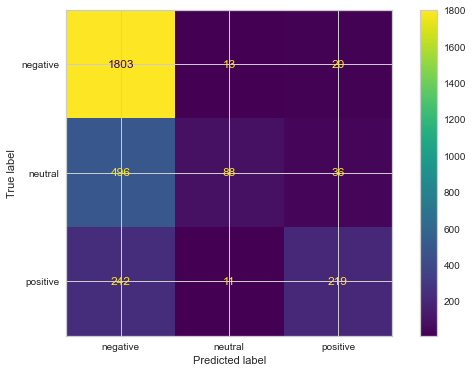

In [152]:
print("RF MODEL")
eval(rf, X_train_count, X_test_count)

# recall çok yüksekken precision düşük. burda RF i seçerken neye dikkat edeceğiz? ilerleyen bölümlerde bunu tartışacağız.

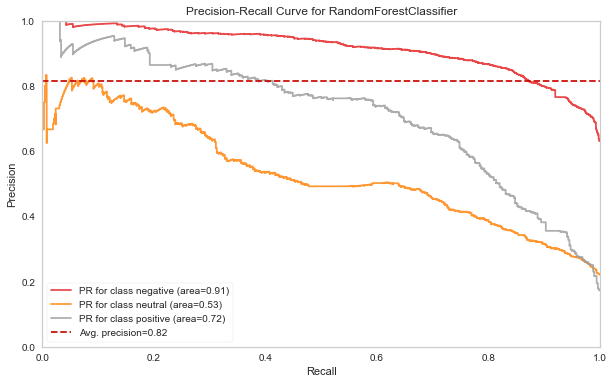

In [153]:
viz = PrecisionRecallCurve(
    RandomForestClassifier(100, max_depth = 40, random_state = 42, n_jobs = -1),
    classes=rf.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [154]:
y_pred = rf.predict(X_test_count)
rf_count_rec_neg = recall_score(y_test, y_pred, labels = ["negative"], average = None)
rf_count_f1_neg = f1_score(y_test, y_pred, labels = ["negative"], average = None)
rf_AP_neg = viz.score_["negative"]

In [155]:
rf = RandomForestClassifier(100, max_depth = 40, random_state = 42, n_jobs = -1, class_weight="balanced")
rf.fit(X_train_count, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=40, n_jobs=-1,
                       random_state=42)

RF MODEL BALANCED
Test_Set
              precision    recall  f1-score   support

    negative       0.87      0.77      0.82      1836
     neutral       0.48      0.65      0.55       620
    positive       0.68      0.67      0.68       472

    accuracy                           0.73      2928
   macro avg       0.68      0.70      0.68      2928
weighted avg       0.76      0.73      0.74      2928

Train_Set
              precision    recall  f1-score   support

    negative       0.98      0.84      0.90      7342
     neutral       0.63      0.92      0.75      2479
    positive       0.88      0.82      0.85      1891

    accuracy                           0.85     11712
   macro avg       0.83      0.86      0.83     11712
weighted avg       0.89      0.85      0.86     11712



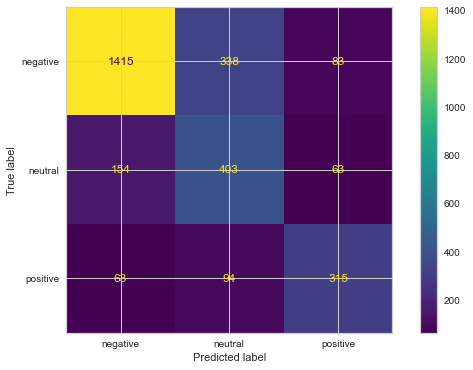

In [156]:
print("RF MODEL BALANCED")
eval(rf, X_train_count, X_test_count)

## Ada Boost

In [157]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators= 500, random_state = 42)
ada.fit(X_train_count, y_train)

AdaBoostClassifier(n_estimators=500, random_state=42)

Ada MODEL
Test_Set
              precision    recall  f1-score   support

    negative       0.83      0.84      0.84      1836
     neutral       0.54      0.55      0.55       620
    positive       0.69      0.66      0.68       472

    accuracy                           0.75      2928
   macro avg       0.69      0.68      0.69      2928
weighted avg       0.75      0.75      0.75      2928

Train_Set
              precision    recall  f1-score   support

    negative       0.86      0.88      0.87      7342
     neutral       0.62      0.61      0.61      2479
    positive       0.79      0.71      0.75      1891

    accuracy                           0.80     11712
   macro avg       0.76      0.74      0.74     11712
weighted avg       0.80      0.80      0.80     11712



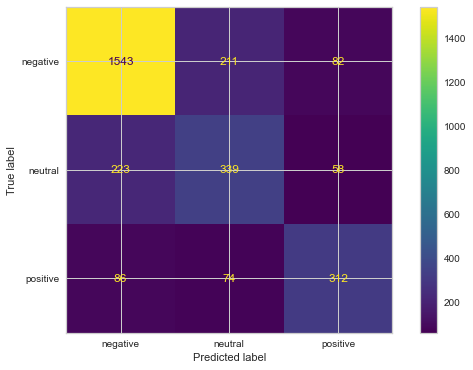

In [158]:
print("Ada MODEL")
eval(ada, X_train_count, X_test_count)

# burada precision ve recall ın dengeli (birbirine yakın) olduğunu gördüm. 
# f1-score un recall a yakın olması zaten precision ın da yakın olmasını gerektiriyor. 

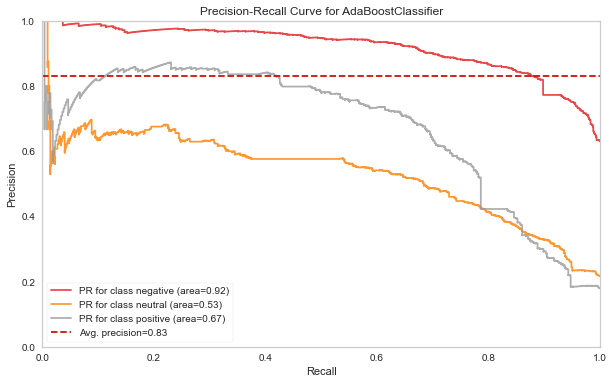

In [159]:
viz = PrecisionRecallCurve(
    AdaBoostClassifier(n_estimators= 500, random_state = 42),
    classes=ada.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [160]:
y_pred = ada.predict(X_test_count)
ada_count_rec_neg = recall_score(y_test, y_pred, labels = ["negative"], average = None)
ada_count_f1_neg = f1_score(y_test, y_pred, labels = ["negative"], average = None)
ada_AP_neg = viz.score_["negative"]

## TF-IDF

In [161]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [162]:
tf_idf_vectorizer = TfidfVectorizer()
X_train_tf_idf = tf_idf_vectorizer.fit_transform(X_train)
X_test_tf_idf = tf_idf_vectorizer.transform(X_test)

# tf_idf: fit deyince X_traindeki tüm unique tokenleri tespit ediyor ve bütün satırlarda (dokümanlarda) o tokenin geçme sıklığını da sayıyor.
# count vectorizer da sadece unique tokenleri tespit ediyordu burda dokümanlardaki tekrar sayısı da işin içinde..

# transform deyince bunları sayıyor ve fonksiyonu uygulayıp tf-idf katsayılarını buluyor.

In [163]:
X_train_tf_idf.toarray()

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.32332003, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [164]:
pd.DataFrame(X_train_tf_idf.toarray(), columns = tf_idf_vectorizer.get_feature_names())

,aa,aadvantage,abc,ability,able,aboard,abq,absolute,absolutely,absurd,abt,abysmal,ac,accept,acceptable,accepted,accepting,access,accident,accidentally,accommodate,accommodating,accommodation,accomplished,according,...,yell,yelled,yelling,yep,yes,yest,yesterday,yet,yo,york,youd,youll,young,youre,yousuck,youth,youve,yr,yuma,yup,yvr,yyz,zero,zone,zurich
0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.342829,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11707,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11708,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11709,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11710,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Model Comparisons  TF-IDF

## Naive Bayes

In [165]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
nb = MultinomialNB()
nb.fit(X_train_tf_idf, y_train)

MultinomialNB()

NB MODEL
Test_Set
              precision    recall  f1-score   support

    negative       0.73      0.98      0.84      1836
     neutral       0.73      0.29      0.41       620
    positive       0.85      0.42      0.56       472

    accuracy                           0.74      2928
   macro avg       0.77      0.56      0.60      2928
weighted avg       0.75      0.74      0.70      2928

Train_Set
              precision    recall  f1-score   support

    negative       0.76      0.99      0.86      7342
     neutral       0.84      0.37      0.51      2479
    positive       0.92      0.50      0.65      1891

    accuracy                           0.78     11712
   macro avg       0.84      0.62      0.67     11712
weighted avg       0.80      0.78      0.75     11712



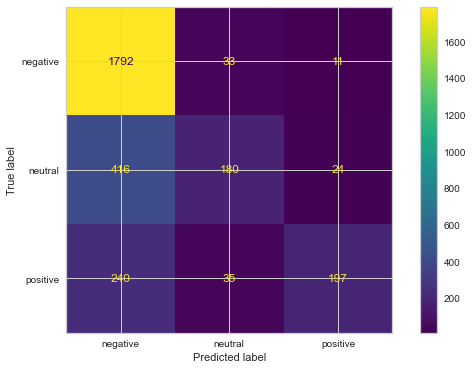

In [166]:
print("NB MODEL")
eval(nb, X_train_tf_idf, X_test_tf_idf)

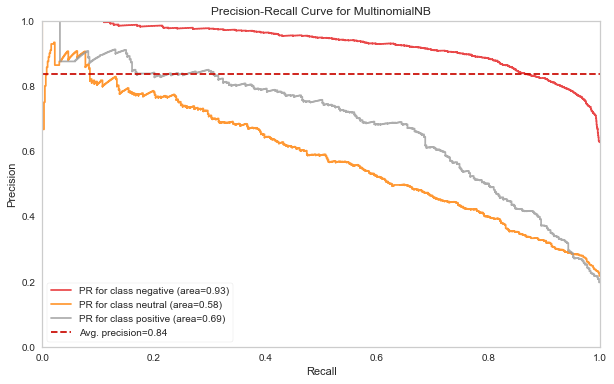

In [167]:
viz = PrecisionRecallCurve(
    MultinomialNB(),
    classes=nb.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [168]:
y_pred = nb.predict(X_test_tf_idf)
nb_tfidf_rec_neg = recall_score(y_test, y_pred, labels = ["negative"], average = None)
nb_tfidf_f1_neg = f1_score(y_test, y_pred, labels = ["negative"], average = None)
nb_tfidf_AP_neg = viz.score_["negative"]

## Logistic Regression

In [169]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(C=0.4, max_iter=1000)  # bu defa c parametresinin 0.4 olması gerektiğini deneyerek tespit ettim.
log.fit(X_train_tf_idf,y_train)

LogisticRegression(C=0.4, max_iter=1000)

LOG MODEL
Test_Set
              precision    recall  f1-score   support

    negative       0.78      0.96      0.86      1836
     neutral       0.71      0.40      0.51       620
    positive       0.84      0.57      0.68       472

    accuracy                           0.78      2928
   macro avg       0.78      0.64      0.68      2928
weighted avg       0.77      0.78      0.76      2928

Train_Set
              precision    recall  f1-score   support

    negative       0.80      0.98      0.88      7342
     neutral       0.82      0.50      0.62      2479
    positive       0.88      0.60      0.71      1891

    accuracy                           0.81     11712
   macro avg       0.83      0.69      0.74     11712
weighted avg       0.82      0.81      0.80     11712



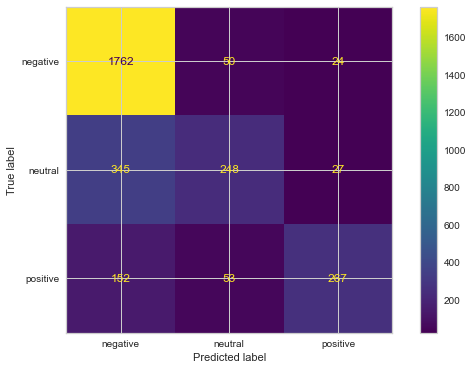

In [170]:
print("LOG MODEL")
eval(log, X_train_tf_idf, X_test_tf_idf)

# negatiflerin ayırımı için yüzde 96 skor olduğunu gördüm. iyi bir skor

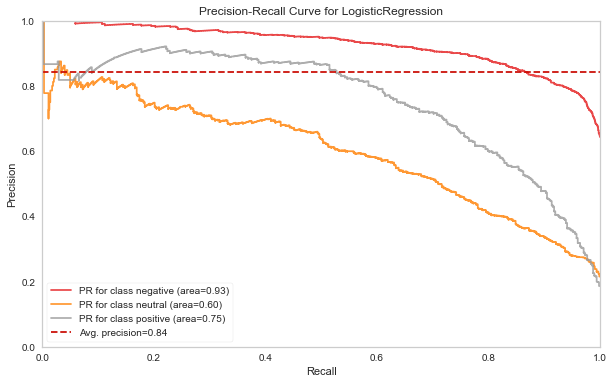

In [171]:
viz = PrecisionRecallCurve(
    LogisticRegression(C=0.4, max_iter=1000),
    classes=log.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [172]:
y_pred = log.predict(X_test_tf_idf)
log_tfidf_rec_neg = recall_score(y_test, y_pred, labels = ["negative"], average = None)
log_tfidf_f1_neg = f1_score(y_test, y_pred, labels = ["negative"], average = None)
log_tfidf_AP_neg = viz.score_["negative"]

In [173]:
log = LogisticRegression(C=0.4, max_iter=1000, class_weight="balanced")
log.fit(X_train_tf_idf,y_train)

LogisticRegression(C=0.4, class_weight='balanced', max_iter=1000)

LOG MODEL BALANCED
Test_Set
              precision    recall  f1-score   support

    negative       0.89      0.78      0.83      1836
     neutral       0.53      0.69      0.60       620
    positive       0.67      0.76      0.71       472

    accuracy                           0.75      2928
   macro avg       0.70      0.74      0.71      2928
weighted avg       0.78      0.75      0.76      2928

Train_Set
              precision    recall  f1-score   support

    negative       0.94      0.81      0.87      7342
     neutral       0.62      0.81      0.70      2479
    positive       0.75      0.85      0.80      1891

    accuracy                           0.81     11712
   macro avg       0.77      0.82      0.79     11712
weighted avg       0.84      0.81      0.82     11712



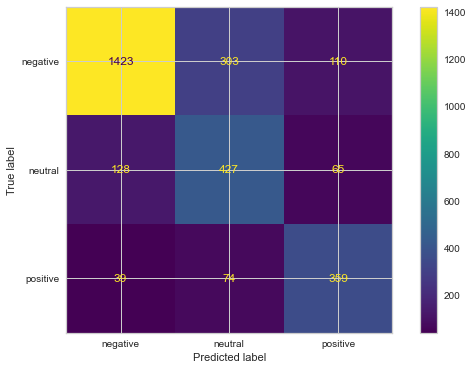

In [174]:
print("LOG MODEL BALANCED")
eval(log, X_train_tf_idf, X_test_tf_idf)

## SVM

In [175]:
from sklearn.svm import LinearSVC
svc = LinearSVC(C=0.1)
svc.fit(X_train_tf_idf,y_train)

# Emir'in benim f1 skorum 86 çıktı diye sorması üzerine: 
# random state kullanmadığınız için skorlarınız birbirinden biraz farklı olabilir. dedi hoca

LinearSVC(C=0.1)

SVC MODEL
Test_Set
              precision    recall  f1-score   support

    negative       0.79      0.96      0.87      1836
     neutral       0.72      0.40      0.52       620
    positive       0.81      0.62      0.70       472

    accuracy                           0.78      2928
   macro avg       0.77      0.66      0.69      2928
weighted avg       0.78      0.78      0.77      2928

Train_Set
              precision    recall  f1-score   support

    negative       0.82      0.98      0.89      7342
     neutral       0.83      0.53      0.65      2479
    positive       0.88      0.67      0.76      1891

    accuracy                           0.83     11712
   macro avg       0.84      0.73      0.77     11712
weighted avg       0.83      0.83      0.82     11712



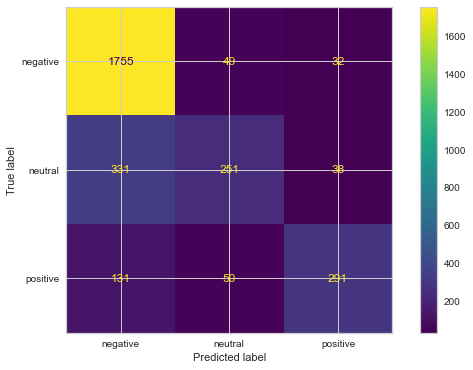

In [176]:
print("SVC MODEL")
eval(svc, X_train_tf_idf, X_test_tf_idf)

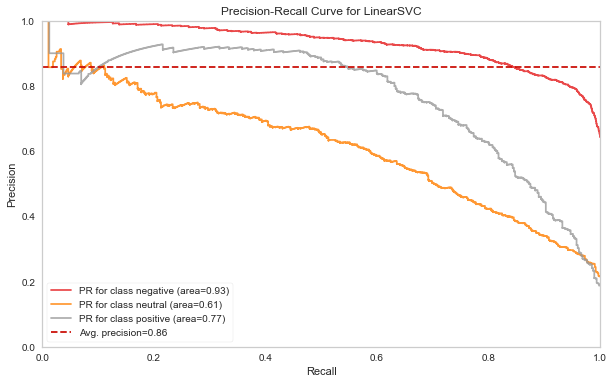

In [177]:
viz = PrecisionRecallCurve(
    LinearSVC(C=0.1),
    classes=svc.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [178]:
y_pred = svc.predict(X_test_tf_idf)
svc_tfidf_rec_neg = recall_score(y_test, y_pred, labels = ["negative"], average = None)
svc_tfidf_f1_neg = f1_score(y_test, y_pred, labels = ["negative"], average = None)
svc_tfidf_AP_neg = viz.score_["negative"]

## KNN

In [179]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_tf_idf,y_train)

KNeighborsClassifier(n_neighbors=7)

KNN MODEL
Test_Set
              precision    recall  f1-score   support

    negative       0.72      0.17      0.27      1836
     neutral       0.22      0.85      0.35       620
    positive       0.81      0.18      0.30       472

    accuracy                           0.31      2928
   macro avg       0.59      0.40      0.31      2928
weighted avg       0.63      0.31      0.29      2928

Train_Set
              precision    recall  f1-score   support

    negative       0.85      0.33      0.47      7342
     neutral       0.27      0.89      0.41      2479
    positive       0.79      0.24      0.37      1891

    accuracy                           0.43     11712
   macro avg       0.63      0.49      0.42     11712
weighted avg       0.72      0.43      0.44     11712



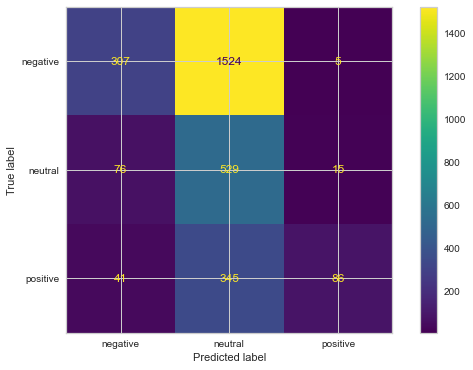

In [180]:
print("KNN MODEL")
eval(knn, X_train_tf_idf, X_test_tf_idf)

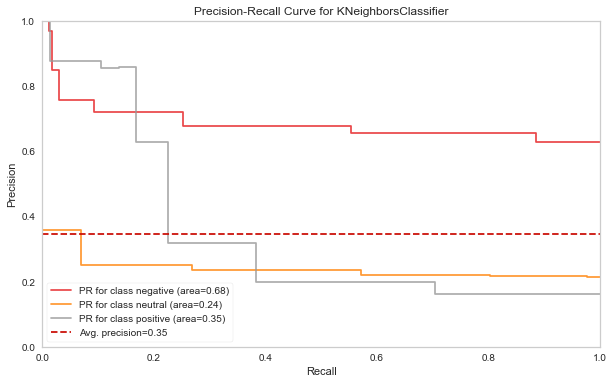

In [181]:
viz = PrecisionRecallCurve(
    KNeighborsClassifier(n_neighbors=7),
    classes=knn.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [182]:
y_pred = knn.predict(X_test_tf_idf)
knn_tfidf_rec_neg = recall_score(y_test, y_pred, labels = ["negative"], average = None)
knn_tfidf_f1_neg = f1_score(y_test, y_pred, labels = ["negative"], average = None)
knn_tfidf_AP_neg = viz.score_["negative"]

## RandomForest

In [183]:
rf = RandomForestClassifier(100, max_depth=40, random_state = 42, n_jobs = -1)
rf.fit(X_train_tf_idf, y_train)

RandomForestClassifier(max_depth=40, n_jobs=-1, random_state=42)

RF MODEL
Test_Set
              precision    recall  f1-score   support

    negative       0.70      0.98      0.82      1836
     neutral       0.76      0.12      0.21       620
    positive       0.81      0.45      0.58       472

    accuracy                           0.72      2928
   macro avg       0.76      0.52      0.54      2928
weighted avg       0.73      0.72      0.65      2928

Train_Set
              precision    recall  f1-score   support

    negative       0.74      1.00      0.85      7342
     neutral       0.96      0.26      0.40      2479
    positive       0.95      0.58      0.72      1891

    accuracy                           0.77     11712
   macro avg       0.88      0.61      0.66     11712
weighted avg       0.82      0.77      0.73     11712



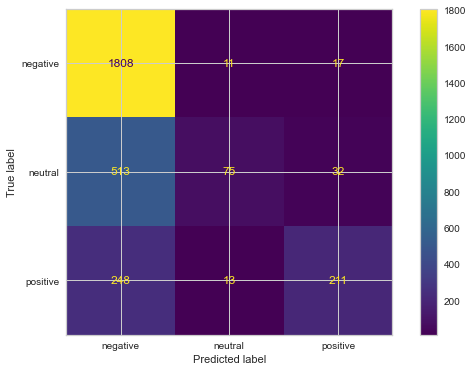

In [184]:
print("RF MODEL")
eval(rf, X_train_tf_idf, X_test_tf_idf)

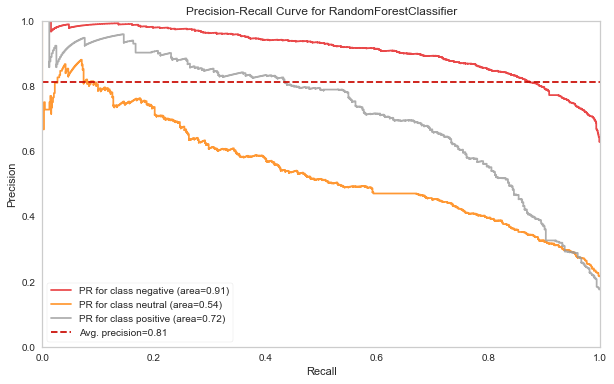

In [185]:
viz = PrecisionRecallCurve(
    RandomForestClassifier(100, max_depth=40, random_state = 42, n_jobs = -1),
    classes=rf.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [186]:
y_pred = rf.predict(X_test_tf_idf)
rf_tfidf_rec_neg = recall_score(y_test, y_pred, labels = ["negative"], average = None)
rf_tfidf_f1_neg = f1_score(y_test, y_pred, labels = ["negative"], average = None)
rf_tfidf_AP_neg = viz.score_["negative"]

In [187]:
rf = RandomForestClassifier(100, max_depth=15, random_state = 42, n_jobs = -1, class_weight="balanced")
rf.fit(X_train_tf_idf, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=15, n_jobs=-1,
                       random_state=42)

RF MODEL BALANCED
Test_Set
              precision    recall  f1-score   support

    negative       0.88      0.71      0.79      1836
     neutral       0.44      0.70      0.54       620
    positive       0.68      0.65      0.66       472

    accuracy                           0.70      2928
   macro avg       0.67      0.69      0.66      2928
weighted avg       0.76      0.70      0.72      2928

Train_Set
              precision    recall  f1-score   support

    negative       0.93      0.74      0.83      7342
     neutral       0.50      0.81      0.62      2479
    positive       0.75      0.71      0.73      1891

    accuracy                           0.75     11712
   macro avg       0.73      0.75      0.72     11712
weighted avg       0.81      0.75      0.77     11712



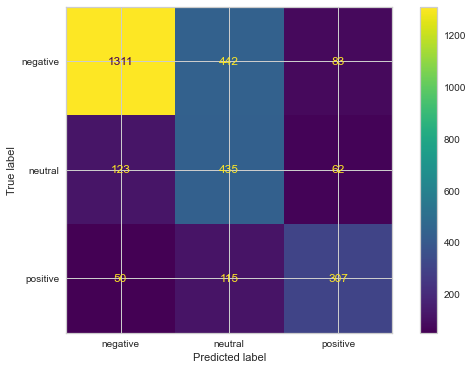

In [188]:
print("RF MODEL BALANCED")
eval(rf, X_train_tf_idf, X_test_tf_idf)

# burada pozitifin negatife göre daha dengeli skor verdiğini gözlemleyebiliyoruz.

## Ada Boost

In [189]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators= 500, random_state = 42)
ada.fit(X_train_tf_idf, y_train)

AdaBoostClassifier(n_estimators=500, random_state=42)

Ada MODEL
Test_Set
              precision    recall  f1-score   support

    negative       0.81      0.84      0.82      1836
     neutral       0.51      0.51      0.51       620
    positive       0.72      0.64      0.68       472

    accuracy                           0.74      2928
   macro avg       0.68      0.66      0.67      2928
weighted avg       0.73      0.74      0.73      2928

Train_Set
              precision    recall  f1-score   support

    negative       0.84      0.87      0.86      7342
     neutral       0.59      0.58      0.59      2479
    positive       0.83      0.72      0.77      1891

    accuracy                           0.79     11712
   macro avg       0.75      0.73      0.74     11712
weighted avg       0.79      0.79      0.78     11712



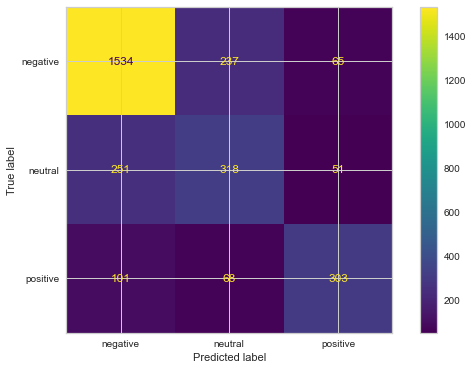

In [190]:
print("Ada MODEL")
eval(ada, X_train_tf_idf, X_test_tf_idf)

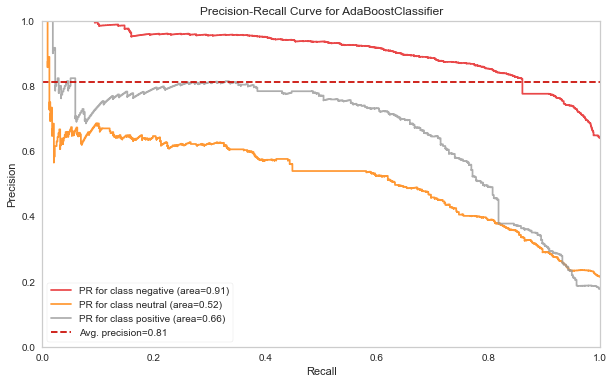

In [191]:
viz = PrecisionRecallCurve(
    AdaBoostClassifier(n_estimators= 500, random_state = 42),
    classes=ada.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [193]:
y_pred = ada.predict(X_test_tf_idf)
ada_tfidf_rec_neg = recall_score(y_test, y_pred, labels = ["negative"], average = None)
ada_tfidf_f1_neg = f1_score(y_test, y_pred, labels = ["negative"], average = None)
ada_tfidf_AP_neg = viz.score_["negative"]

# labels parametresine birden fazla label yazarsak average onların ortalama skorlarını döndürüyor. o zaman average in bir anlamı oluyor.
# fakat labels='a tek bir label yazdığımızda average in de bir anlamı olmuyor. (keza min, max vs. nin de anlamı olmuyor)

# fonksiyon burda 

## Compare Scoring

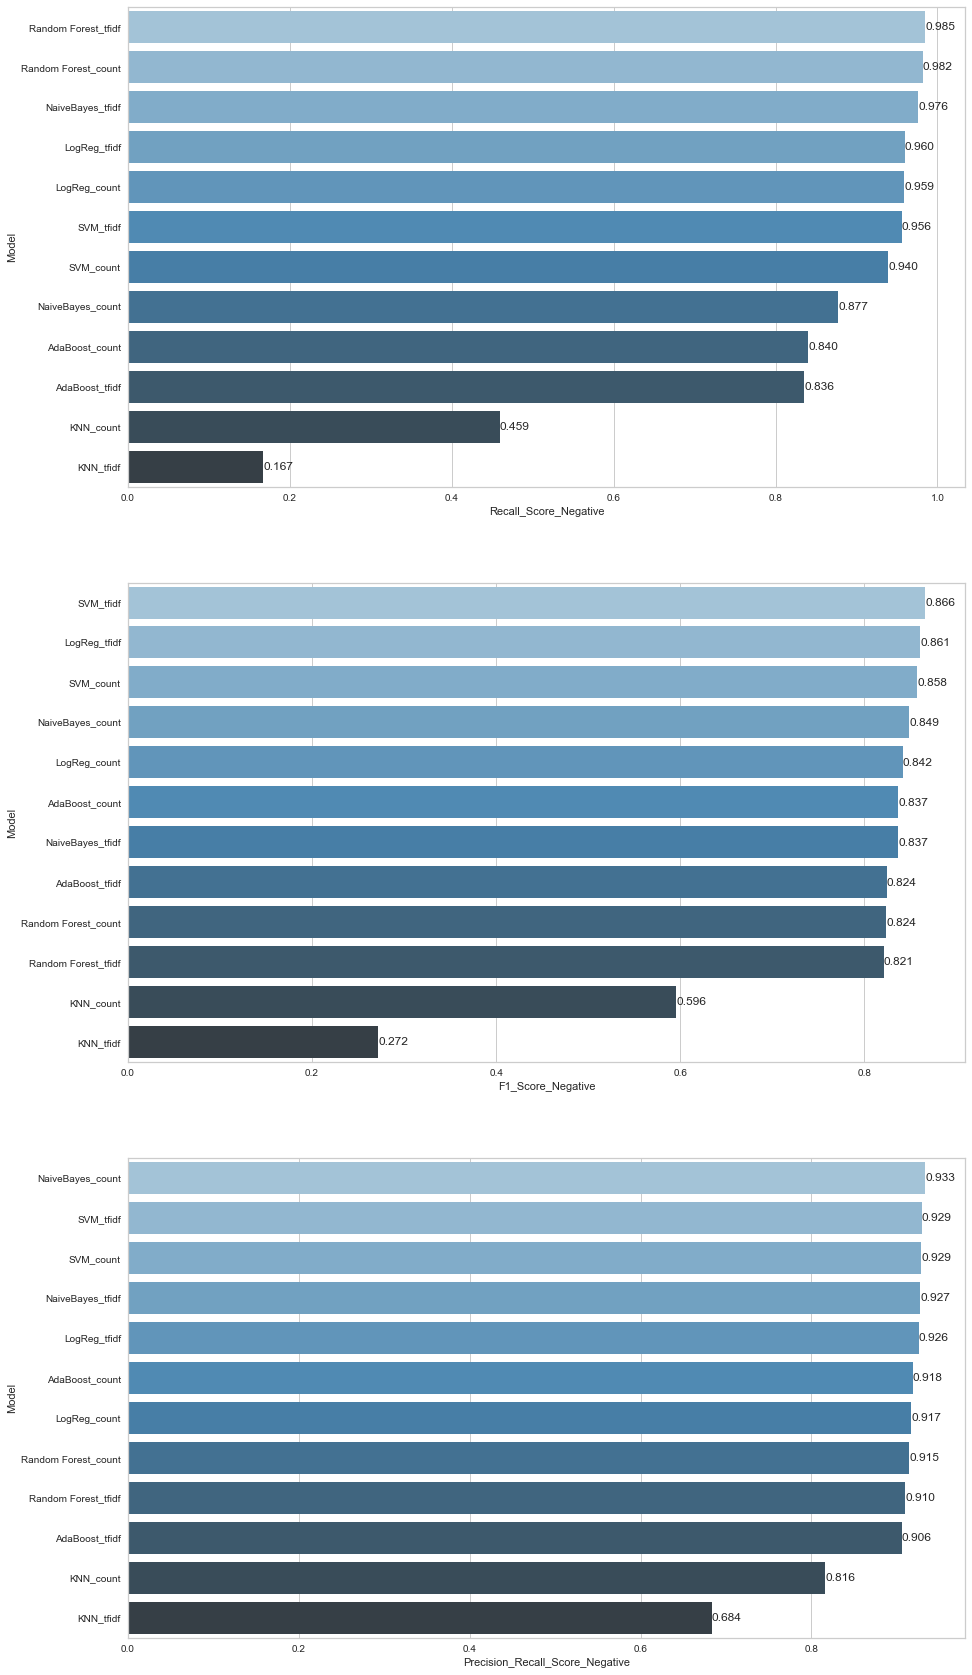

In [194]:
compare = pd.DataFrame({"Model": ["NaiveBayes_count", "LogReg_count", "SVM_count", "KNN_count", "Random Forest_count", 
                                  "AdaBoost_count", "NaiveBayes_tfidf", "LogReg_tfidf", "SVM_tfidf", "KNN_tfidf", 
                                  "Random Forest_tfidf", "AdaBoost_tfidf"],
                        
                        "F1_Score_Negative": [nb_count_f1_neg[0], log_count_f1_neg[0], svc_count_f1_neg[0], knn_count_f1_neg[0],
                                             rf_count_f1_neg[0], ada_count_f1_neg[0], nb_tfidf_f1_neg[0], log_tfidf_f1_neg[0],
                                             svc_tfidf_f1_neg[0], knn_tfidf_f1_neg[0], rf_tfidf_f1_neg[0], ada_tfidf_f1_neg[0]],
                        
                        "Recall_Score_Negative": [nb_count_rec_neg[0], log_count_rec_neg[0], svc_count_rec_neg[0], 
                                                  knn_count_rec_neg[0], rf_count_rec_neg[0], ada_count_rec_neg[0], 
                                                  nb_tfidf_rec_neg[0], log_tfidf_rec_neg[0], svc_tfidf_rec_neg[0], 
                                                  knn_tfidf_rec_neg[0], rf_tfidf_rec_neg[0], ada_tfidf_rec_neg[0]],
                        
                        "Precision_Recall_Score_Negative": [nb_AP_neg, log_AP_neg, svc_AP_neg, knn_AP_neg, rf_AP_neg,
                                                          ada_AP_neg, nb_tfidf_AP_neg, log_tfidf_AP_neg, svc_tfidf_AP_neg,
                                                           knn_tfidf_AP_neg, rf_tfidf_AP_neg, ada_tfidf_AP_neg]})

def labels(ax):
                        
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.3f}'.format(width),             # set variable to display, 3 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment
    
plt.figure(figsize=(15,30))
plt.subplot(311)
compare = compare.sort_values(by="Recall_Score_Negative", ascending=False)
ax=sns.barplot(x="Recall_Score_Negative", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(312)
compare = compare.sort_values(by="F1_Score_Negative", ascending=False)
ax=sns.barplot(x="F1_Score_Negative", y="Model", data=compare, palette="Blues_d")
labels(ax)


plt.subplot(313)
compare = compare.sort_values(by="Precision_Recall_Score_Negative", ascending=False)
ax=sns.barplot(x="Precision_Recall_Score_Negative", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.show();

## Cross Val

In [175]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-neg': make_scorer(precision_score, average=None, labels=["negative"]),
                 'recall-neg': make_scorer(recall_score, average=None, labels = ["negative"]),
                 'f1-neg': make_scorer(f1_score, average=None, labels = ["negative"]),
                 
                 'precision-neutral': make_scorer(precision_score, average=None, labels=["neutral"]),
                 'recall-neutral': make_scorer(recall_score, average=None, labels = ["neutral"]),
                 'f1-neutral': make_scorer(f1_score, average=None, labels = ["neutral"]),
                 
                 'precision-pos': make_scorer(precision_score, average=None, labels=["positive"]),
                 'recall-pos': make_scorer(recall_score, average=None, labels = ["positive"]),
                 'f1-pos': make_scorer(f1_score, average=None, labels = ["positive"]),
                 }

for i, j  in custom_scorer.items():
    model = LogisticRegression(C=0.4, max_iter=1000)
    scores = cross_val_score(model, X_train_tf_idf, y_train, cv = 10, scoring = j, n_jobs = -1).mean()
    print(f" {i:20} score : {scores}\n")

 accuracy             score : 0.766903816055237

 precision-neg        score : 0.7681089506978345

 recall-neg           score : 0.9629527887449258

 f1-neg               score : 0.8545519030908008

 precision-neutral    score : 0.7045340829841505

 recall-neutral       score : 0.37998889904662403

 f1-neutral           score : 0.4933280866069273

 precision-pos        score : 0.8313817347077836

 recall-pos           score : 0.5129546087440824

 f1-pos               score : 0.633690970758092



LOG MODEL
Test_Set
              precision    recall  f1-score   support

    negative       0.78      0.96      0.86      1836
     neutral       0.71      0.40      0.51       620
    positive       0.84      0.57      0.68       472

    accuracy                           0.78      2928
   macro avg       0.78      0.64      0.68      2928
weighted avg       0.77      0.78      0.76      2928

Train_Set
              precision    recall  f1-score   support

    negative       0.80      0.98      0.88      7342
     neutral       0.82      0.50      0.62      2479
    positive       0.88      0.60      0.71      1891

    accuracy                           0.81     11712
   macro avg       0.83      0.69      0.74     11712
weighted avg       0.82      0.81      0.80     11712



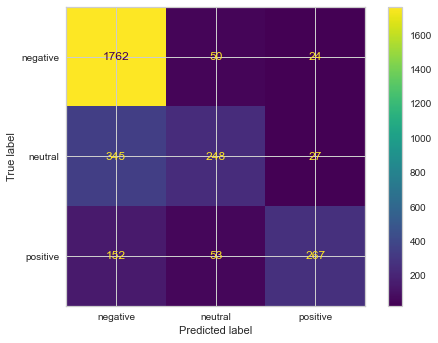

In [176]:
log = LogisticRegression(C=0.4, max_iter=1000).fit(X_train_tf_idf, y_train)
print("LOG MODEL")
eval(log, X_train_tf_idf, X_test_tf_idf)

## For New Tweets, prediction with pipeline


In [177]:
from sklearn.pipeline import Pipeline

In [178]:
pipe = Pipeline([('tfidf',TfidfVectorizer()),('log',LogisticRegression(C=0.4, max_iter=1000))])

In [179]:
pipe.fit(X, y)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('log', LogisticRegression(C=0.4, max_iter=1000))])

In [180]:
tweet = "it was not the worst flight i have ever been"
tweet = pd.Series(tweet).apply(cleaning)
pipe.predict(tweet)

array(['negative'], dtype=object)

In [181]:
tweet = "don't enjoy flight"
tweet = pd.Series(tweet).apply(cleaning)
pipe.predict(tweet)

array(['negative'], dtype=object)

In [182]:
tweet = "ok flight"
tweet = pd.Series(tweet).apply(cleaning)
pipe.predict(tweet)

array(['neutral'], dtype=object)

In [183]:
tweet = "didn't enjoy flight"
tweet = pd.Series(tweet).apply(cleaning)
pipe.predict(tweet)

array(['negative'], dtype=object)

In [184]:
tweet = "doesn't enjoy flight"
tweet = pd.Series(tweet).apply(cleaning)
pipe.predict(tweet)

array(['negative'], dtype=object)

In [185]:
tweet = "I love NLP"
tweet = pd.Series(tweet).apply(cleaning)
pipe.predict(tweet)

array(['positive'], dtype=object)

In [186]:
tweet = "like"
tweet = pd.Series(tweet).apply(cleaning)
pipe.predict(tweet)

# like negative çıktı!!!!

array(['negative'], dtype=object)

In [188]:
X

0                                                     said
1                   plus youve added commercial experience
2             didnt today must mean need take another trip
3        really aggressive entertainment guest face amp...
4                                     really big bad thing
                               ...                        
14635                   thank got different flight chicago
14636    leaving minute late flight warning communicati...
14637                        please bring american airline
14638    money change flight dont answer phone suggesti...
14639    ppl need know many seat next flight plz put u ...
Name: text, Length: 14640, dtype: object

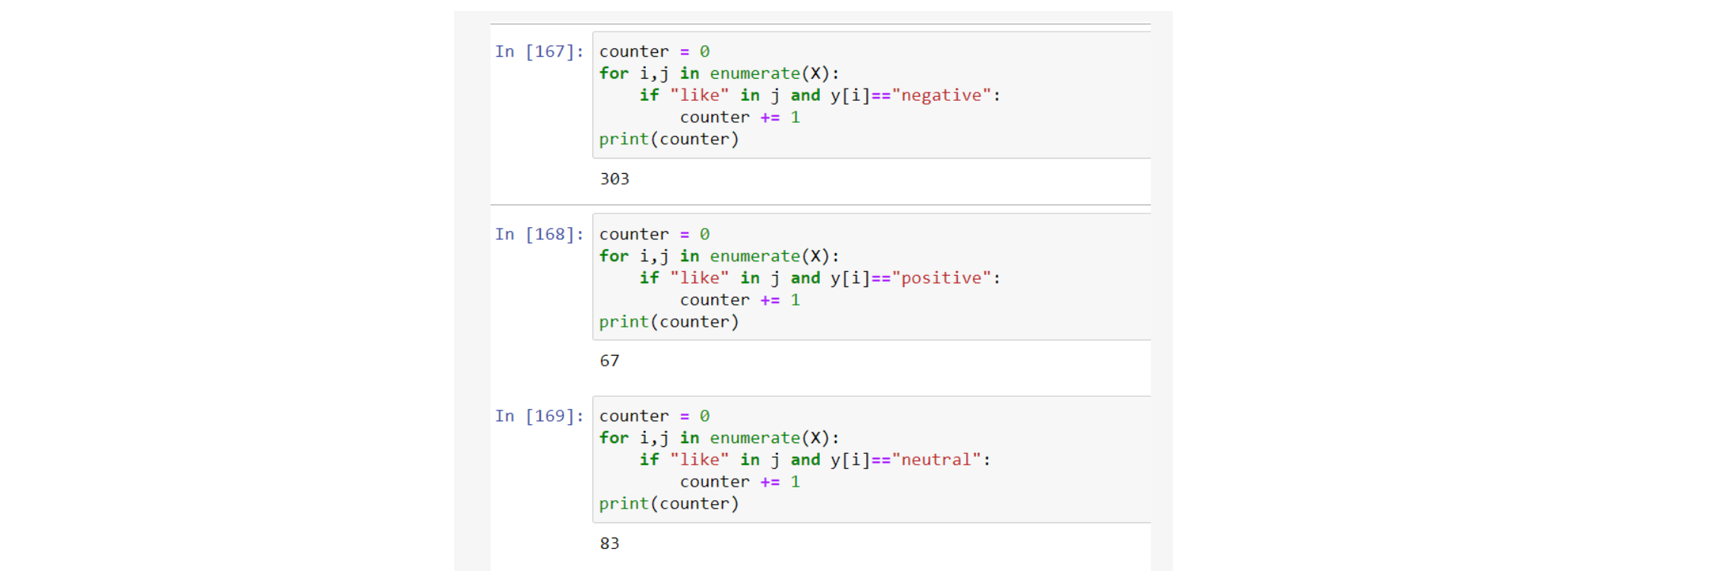

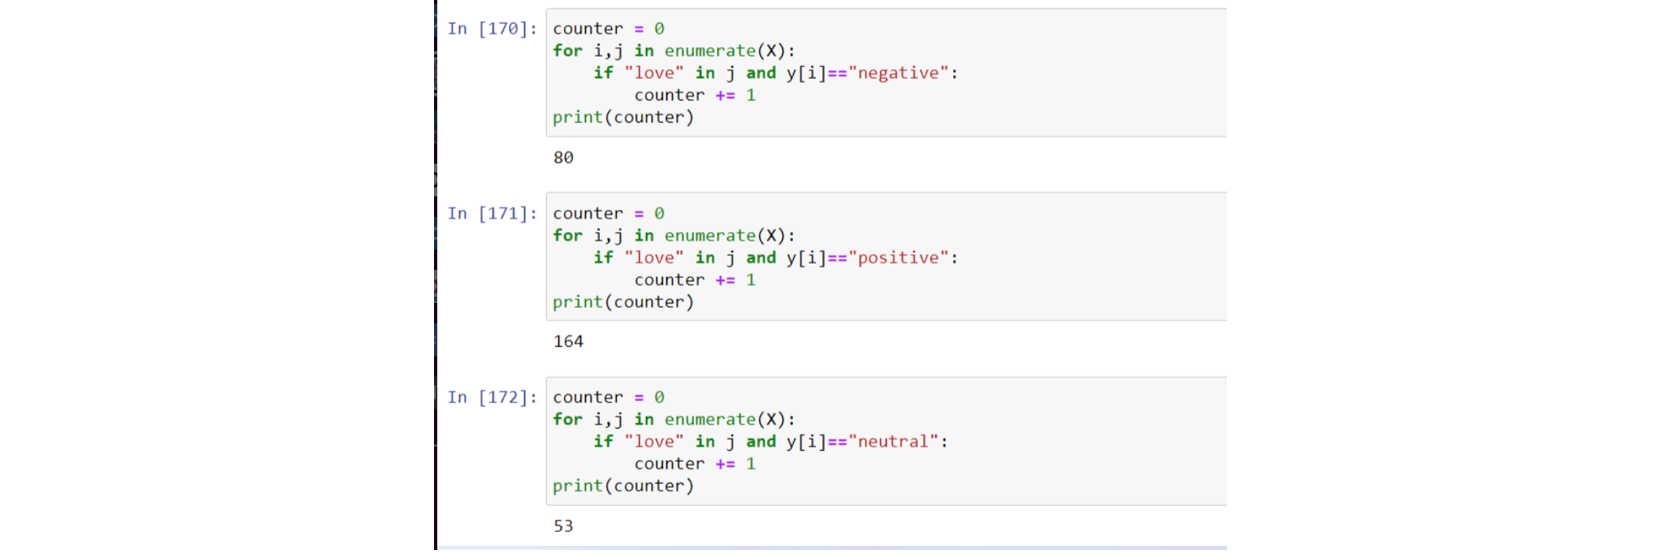

## WordCloud - Repetition of Words

## Collect Words

In [118]:
tweets = df2["text"]
tweets

0                                                     said
1                   plus youve added commercial experience
2             didnt today must mean need take another trip
3        really aggressive entertainment guest face amp...
4                                     really big bad thing
                               ...                        
14635                   thank got different flight chicago
14636    leaving minute late flight warning communicati...
14637                        please bring american airline
14638    money change flight dont answer phone suggesti...
14639    ppl need know many seat next flight plz put u ...
Name: text, Length: 14640, dtype: object

In [119]:
all_words = " ".join(tweets)

In [120]:
all_words[:100]

'said plus youve added commercial experience didnt today must mean need take another trip really aggr'

## Create Word Cloud

In [123]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\hüseyin\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


In [135]:
from wordcloud import WordCloud

In [136]:
wordcloud = WordCloud(background_color="white", max_words =250)

In [139]:
wordcloud.generate(all_words)

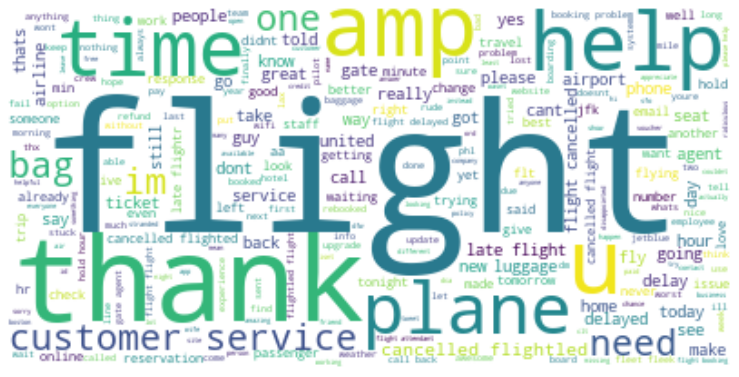

In [140]:
import matplotlib.pyplot as plt
plt.figure(figsize = (13,13))
plt.imshow(wordcloud, interpolation="bilinear",)
plt.axis("off")
plt.show()

## Counting words

In [129]:
counter = Counter(word_tokenize(all_words))

In [130]:
counter.most_common(50)

[('flight', 4544),
 ('get', 1374),
 ('http', 1210),
 ('hour', 1138),
 ('thanks', 1078),
 ('cancelled', 1056),
 ('u', 994),
 ('service', 989),
 ('time', 946),
 ('customer', 934),
 ('help', 869),
 ('bag', 766),
 ('im', 743),
 ('plane', 725),
 ('amp', 683),
 ('hold', 642),
 ('need', 633),
 ('thank', 602),
 ('still', 580),
 ('one', 580),
 ('cant', 577),
 ('please', 564),
 ('call', 561),
 ('airline', 555),
 ('would', 549),
 ('day', 549),
 ('gate', 541),
 ('delayed', 537),
 ('back', 525),
 ('flightled', 506),
 ('dont', 490),
 ('seat', 480),
 ('got', 480),
 ('phone', 453),
 ('delay', 439),
 ('like', 432),
 ('today', 427),
 ('late', 426),
 ('guy', 423),
 ('agent', 416),
 ('know', 381),
 ('fly', 380),
 ('ticket', 380),
 ('make', 375),
 ('waiting', 368),
 ('airport', 367),
 ('change', 360),
 ('way', 358),
 ('trying', 348),
 ('minute', 345)]